# Correlation: Comparing 2 Continuous Variables

What is it?
- describes the strength and direction of an association between two variables

Why do we care?
- using math, we can check if two variables are related
- can use this knowledge for feature selection and multivariate analysis in the data pipeline

In [1]:
#standard ds imports
import numpy as np
import pandas as pd

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#we love stats!!!
from scipy import stats

## When do we use it? 

- when are you trying to determine a LINEAR RELATIONSHIP between TWO CONTINUOUS variables

## How does it describe the strength and direction?

- it uses a correlation coefficient, r
- it will be a unitless value
- it can range from -1 to 1
    - the closer to 1 or -1, the greater the strength of the relationship
    - 0 implies no correlation
    - positive means positive relationship
    - negative means negative relationship

# Show us!

## Examples of Different Correlations

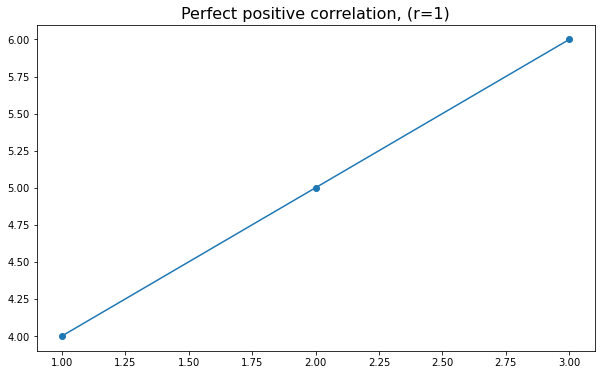

In [2]:
x = [1, 2, 3]
y = [4, 5, 6]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Perfect positive correlation, (r=1)', size=16)
plt.show()

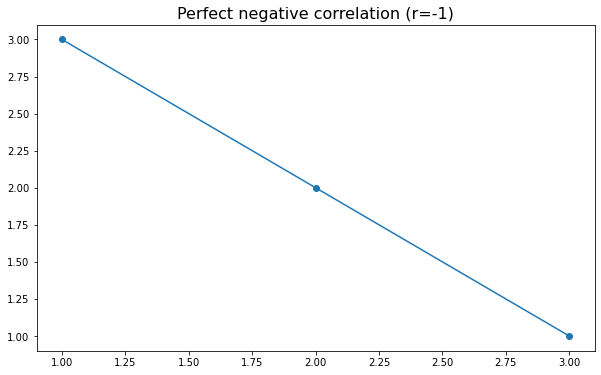

In [3]:
x = [3, 2, 1]
y = [1, 2, 3]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Perfect negative correlation (r=-1)', size=16)
plt.show()

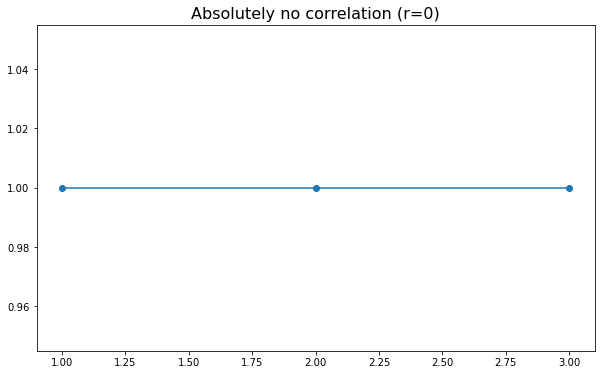

In [4]:
x = [1, 2, 3]
y = [1, 1, 1]

plt.figure(figsize=(10,6))
plt.plot(x, y, marker='o')
plt.title('Absolutely no correlation (r=0)', size=16)
plt.show()

r = 0.0075858503128409666


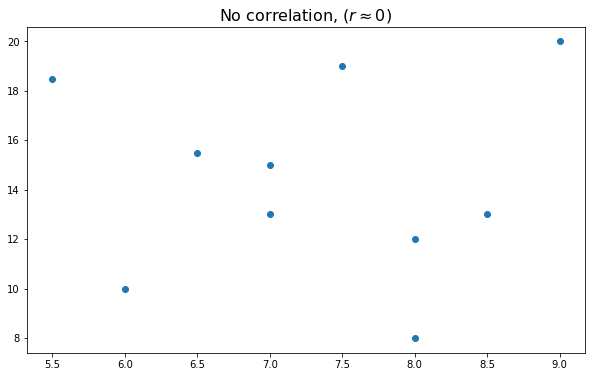

In [5]:
x = [8,7,6.5,7,6,7.5,8.5,9,8,5.5]
y = [12,13,15.5,15,10,19,13,20,8,18.5]

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(r'No correlation, ($r \approx 0$)', size=16)

print('r =', r)

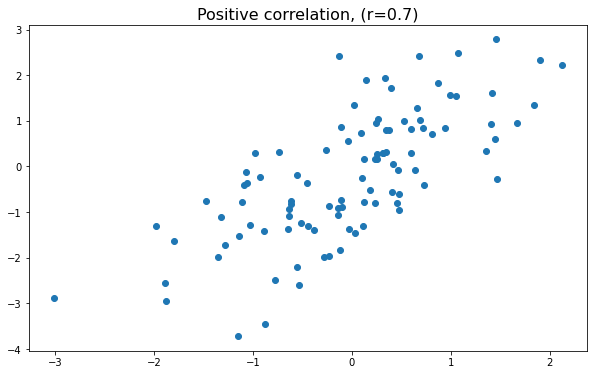

In [6]:
x = np.random.randn(100)
y = x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(f'Positive correlation, (r={round(r,1)})', size=16)
plt.show()

r = -0.8007657929098113
p = 1.5330340802632974e-23


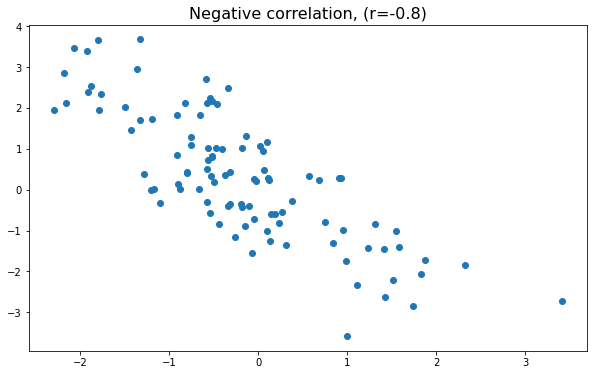

In [7]:
x = np.random.randn(100)
y = -x + (np.random.randn(100) * 1.1)

r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title(f'Negative correlation, (r={round(r,1)})', size=16)
plt.show()

## Cheat Sheet

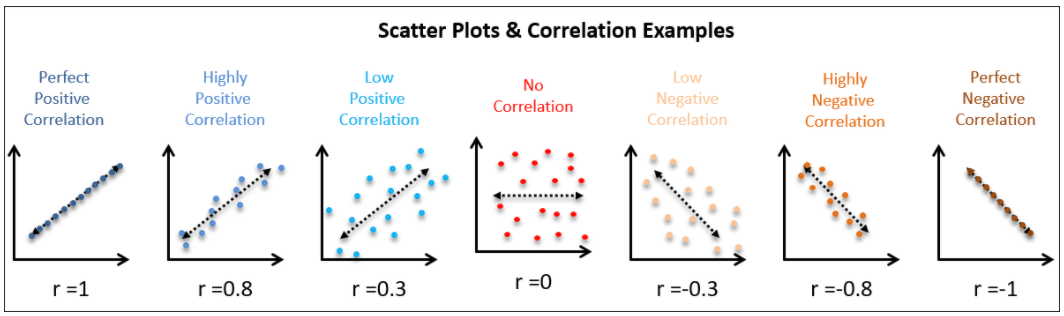

## Now that you're expert correlation-ers

http://guessthecorrelation.com/

# How do we calculate it?

### Hypothesis Testing Procedure:

1. Determine the appropriate test
    - what variables you are comparing?
    - are your variables continuous or categorical?
2. Setup
    - set null hypothesis
    - set alternate hypothesis
    - set p-values
3. Visualize    
4. Calculate test statistic + p-value 
5. Conclude

### Setup for correlation test: 

- if both variables are continuous, we can use our correlation test!


- for normal distributions: `stats.pearsonr`
- for nonparametic test: `stats.spearmanr`


- $H_0$: there is no linear relationship between the two variables

## Let's see it!

### Example: exam scores

In [8]:
#the data
url = 'https://gist.githubusercontent.com/ryanorsinger/\
2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv'

In [10]:
#get our data & look at it!
df = pd.read_csv(url)
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


### What's the relationship between exam score and hours studied?


#### 1. Determine the appropriate test
    - what variables you are comparing?
    - are your variables continuous or categorical?

In [12]:
df.exam_score.head()

0    100.591011
1     95.637086
2     53.200296
3     63.934268
4     51.186370
Name: exam_score, dtype: float64

In [13]:
df.hours_studied.head()

0    9.126291
1    9.677438
2    4.550207
3    6.487848
4    6.720959
Name: hours_studied, dtype: float64

> both are continuous, therefore, we can use our correlation test

#### 2. Setup
    - null hypothesis
    - alternate hypothesis
    - alpha

$H_0$: There is no linear relationship between exam scores and hours studied

$H_a$: There is a linear relationship between exam score and hours studied

In [15]:
#related to the 95% confidence level
alpha = 0.05

#### 3. Visualize

Q: What kind of plot do we want to use when comparing two continuous variables?

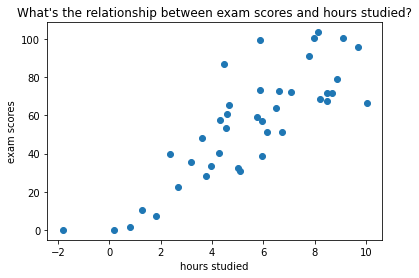

In [25]:
#plot our variables

plt.scatter(df.hours_studied, df.exam_score)

plt.title("What's the relationship between exam scores and hours studied?")
plt.xlabel('hours studied')
plt.ylabel('exam scores')
plt.show()

We can see the relationship between them!

#### 4. Calculate test statistic + p-value

In [26]:
#returns both r and p, respectively
stats.pearsonr(df.hours_studied, df.exam_score)

(0.8351498542413308, 2.0762953315462826e-11)

In [27]:
#run stats.pearsonr
r, p = stats.pearsonr(df.exam_score, df.hours_studied)

In [28]:
#output results
print('r =', r)
print('p =', p)

r = 0.8351498542413308
p = 2.0762953315462826e-11


#### 5. Conclude

In [24]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


> we reject the null hypothesis that says there is no linear relationship between exam scores and hours studied

> therefore, we are impling there IS a linear relationship between exam scores and hours studied

## Correlation "gotchas"

When looking at correlation, keep in mind:

1. Correlation is not causation!
2. This is just looking at a *linear* relationship
3. Correlation itself just looks 2 variables, there could be more going on
4. Correlation doesn't tell us how large the relationship is

## 1. Example: not causation!

http://www.tylervigen.com/spurious-correlations

## 2. Example: non-linear relationship

- $H_o$: there is no linear relationship between x and y 
- $H_a$: there is a linear relationship between x and y

In [29]:
x = np.linspace(-3, 3)
y = x ** 2

In [30]:
#calculate r and p
r, p = stats.pearsonr(x,y)

print('r =', r)
print('p =', p)

r = -1.5159661290581518e-16
p = 0.999999999999995


In [31]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


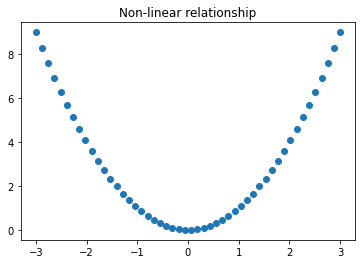

In [32]:
#plot it
plt.scatter(x,y)

plt.title('Non-linear relationship')
plt.show()

> there IS a relationship between x and y 

> however, it is NOT linear

## 3. Example: confounding variable

### What is the relationship between coffee consumed and exam scores?

In [35]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


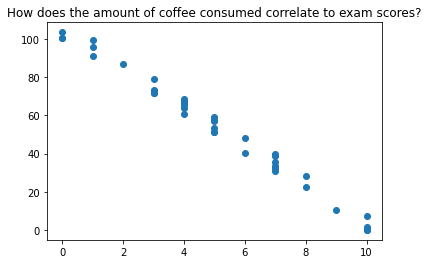

In [36]:
#plot it
plt.scatter(df.coffee_consumed, df.exam_score)

plt.title('How does the amount of coffee consumed correlate to exam scores?')
plt.show()

In [37]:
#calculate r and p 
r,p = stats.pearsonr(df.coffee_consumed, df.exam_score)

print('r = ', r)
print('p = ', p)

r =  -0.9937792168631225
p =  7.739013921768295e-38


This shows us that exam scores and coffee consumed have a strong negative correlation. 

But is there something else affecting this? 

Probably hours slept! This is known as a confounding variable.

## Let's look at hours slept compared to both variables

In [40]:
r_sleep_coffee, _ = stats.pearsonr(df.hours_slept, df.coffee_consumed)
r_sleep_score, _ = stats.pearsonr(df.hours_slept, df.exam_score)

print('Correlation between hours slept and coffee consumed')
print(f'  r = {r_sleep_coffee:.3f}')
print('Correlation between hours slept and exam score')
print(f'  r = {r_sleep_score:.3f}')

Correlation between hours slept and coffee consumed
  r = -1.000
Correlation between hours slept and exam score
  r = 0.994


#### This is a confounder

We saw a correlation between our independent variable and dependent variable 
> coffee consumed ----> exam scores 


However, we have a confounder that affects both our independent variable and dependent variable

> hours slept ----> coffee consumed

>  &

> hours slept ----> exam score

Therefore, our confounder caused spurious correlation between our indepedent variable and dependent variable 

## 4. Example: relationship magnitude

### How does coffee consumption relate to exam scores?

In [41]:
coffee_consumption = [0, 1, 2, 3, 4]
exam_score = [80, 80.1, 80.2, 80.3, 80.4]

r= 1.0


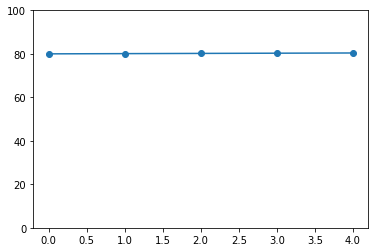

In [42]:
#calculate r and p
r, p = stats.pearsonr(coffee_consumption, exam_score)

#plot it
plt.plot(coffee_consumption, exam_score, marker='o')
plt.ylim(0, 100)

print('r=', r)

## Exercise Guidance

What does it mean to "control for"?

Let's look at the relationship between exam scores and hours studied and control for handedness!

### Regular way - Without controling for a variable

In [43]:
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


#### Setup

$H_0$ : there is no linear relationship between hours studied and exam score

$H_a$ : there is a linear relationship between hours studied and exam score

#### We're gonna use seaborn to plot this time

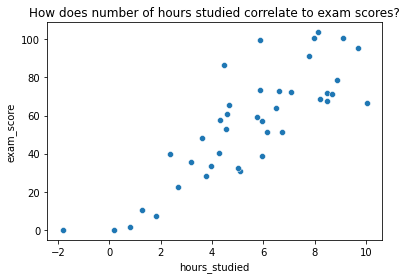

In [44]:
#plot
sns.scatterplot(data=df, x='hours_studied', y='exam_score')
plt.title('How does number of hours studied correlate to exam scores?')
plt.show()

In [45]:
#calculate r and p
r, p = stats.pearsonr(df.hours_studied, df.exam_score)
print('r =', r)
print('p =', p)

r = 0.8351498542413308
p = 2.0762953315462826e-11


### Controlling for handedness!

In [46]:
#look at our data
df.head()

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6
3,63.934268,6.487848,flashcards,right,4,7
4,51.186370,6.720959,flashcards,right,5,6


In [47]:
#look at our handedness options
df.handedness.value_counts()

right    23
left     17
Name: handedness, dtype: int64

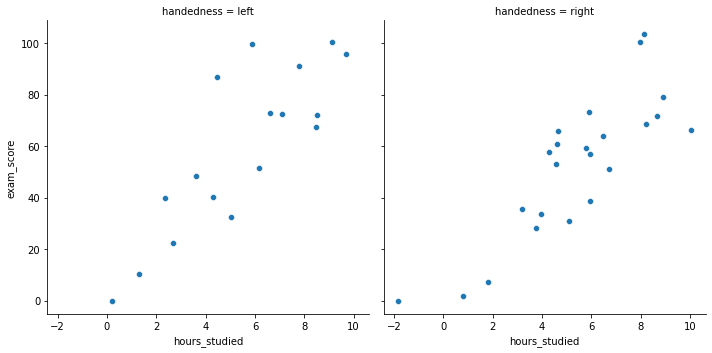

In [50]:
#plot but separate on handedness
sns.relplot(data=df, x='hours_studied', y='exam_score', col='handedness')
plt.show()

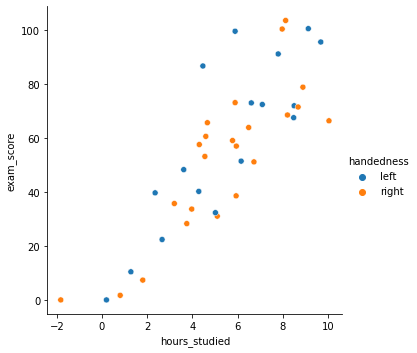

In [51]:
#plot but separate on handedness
sns.relplot(data=df, x='hours_studied', y='exam_score', hue='handedness')
plt.show()

In [55]:
#create separate dfs for left and right handedness
lefties = df [df.handedness == 'left'] 
righties = df [df.handedness == 'right'] 

In [57]:
r, p = stats.pearsonr(lefties.hours_studied, lefties.exam_score)

print('Lefties')
print('  r =', r)
print('  p =', p)

Lefties
  r = 0.8389846518512478
  p = 2.561723682481375e-05


In [58]:
r, p = stats.pearsonr(righties.hours_studied, righties.exam_score)

print('Righties')
print('  r =', r)
print('  p =', p)

Righties
  r = 0.8407115600383273
  p = 5.114047317102283e-07
